**PROBLEM 15**

DAYANANDASHABARI S - 22BTRCL045

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Reading all_hospital.csv and government_hospital.csv
all_hosp = pd.read_csv('Clean_Data/all_hospitals.csv', usecols=['State/UT', 'Hospital Beds'])
govt_hosp = pd.read_csv('government_hospitals.csv', usecols=['State/UT', 'Rural_Government_Beds', 'Urban_Government_Beds'])

merged_data = pd.merge(all_hosp, govt_hosp, on='State/UT') #merging the data

all_hosp['Hospital Beds'] = pd.to_numeric(all_hosp['Hospital Beds'], errors='coerce')#converting data into numeric to calculate per 10000

# Remove rows with missing or invalid values
all_hosp.dropna(subset=['Hospital Beds'], inplace=True)

# Calculate hospital beds per 10,000 people
all_hosp['Beds_Per_10000_People'] = all_hosp['Hospital Beds'] / 10000
national_average=all_hosp['Hospital Beds'].sum()/10000

#Calculating the total number of govt hospitals
govt_hosp['total_govt_hosp'] = govt_hosp['Rural_Government_Beds'] + govt_hosp['Urban_Government_Beds']

#listing the lowest govt hospitals with respect to least lowest beds states
lowest_beds_states = all_hosp.nsmallest(3, 'Beds_Per_10000_People')[['State/UT', 'Beds_Per_10000_People']]
lowest_govt_hosp = lowest_beds_states[govt_hosp['total_govt_hosp'] > 0]

print("States/UTs with the least beds (with government hospitals):")
print(lowest_govt_hosp)

lowest_beds_states_list = lowest_beds_states['State/UT'].tolist()

lowest_govt_hosp = govt_hosp[govt_hosp['State/UT'].isin(lowest_beds_states_list)]
print("\n\nStates/UTs which has the least number of government hospitals can be recommended for setting up a new government hospital:")
print(lowest_govt_hosp)


States/UTs with the least beds (with government hospitals):
                                    State/UT  Beds_Per_10000_People
18                               Lakshadweep                 0.0250
8   Dadra and Nagar Haveli and Daman and Diu                 0.0298
7                       Dadra & Nagar Haveli                 0.0568


States/UTs which has the least number of government hospitals can be recommended for setting up a new government hospital:
       State/UT  Rural_Government_Beds  Urban_Government_Beds  total_govt_hosp
33  Lakshadweep                    300                      0              300


<ipython-input-4-6f113ffa45f1>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_govt_hosp = lowest_beds_states[govt_hosp['total_govt_hosp'] > 0]


**PROBLEM 16**

SURAJ J - 22BTRCL153

In [2]:
import pandas as pd

# Read the data from the CSV file
df = pd.read_csv("/content/census.csv")

# Calculate total state population
total_state_population = df.groupby('State name')['Population'].sum()

# Store the total state population data in a variable (optional)
total_state_population_data = total_state_population.reset_index(name='Total Population')  # Reset index and rename column


# Save the total state population data to a CSV file
total_state_population_data.to_csv("state_population.csv", index=False)

# Print confirmation message
print("Total state population data saved to 'state_population.csv'")

Total state population data saved to 'state_population.csv'


                     State name  expected_beds  Hospital Beds  beds_difference
0   andaman and nicobar islands       1141.743           1246         -104.257
1                andhra pradesh     246708.909          60799       185909.909
2             arunachal pradesh       2610.414           2320          290.414
3                         assam      87768.954          19115        68653.954
4                         bihar     228528.972          17796       210732.972
5                    chandigarh       3166.350           3756         -589.650
6                  chhattisgarh      57725.796          14354        43371.796
7                           goa       4375.635           2666         1709.635
8                       gujarat     154478.676          41129       113349.676
9                       haryana      65042.442          13841        51201.442
10             himachal pradesh      17168.589           8706         8462.589
11            jammu and kashmir      28167.714      

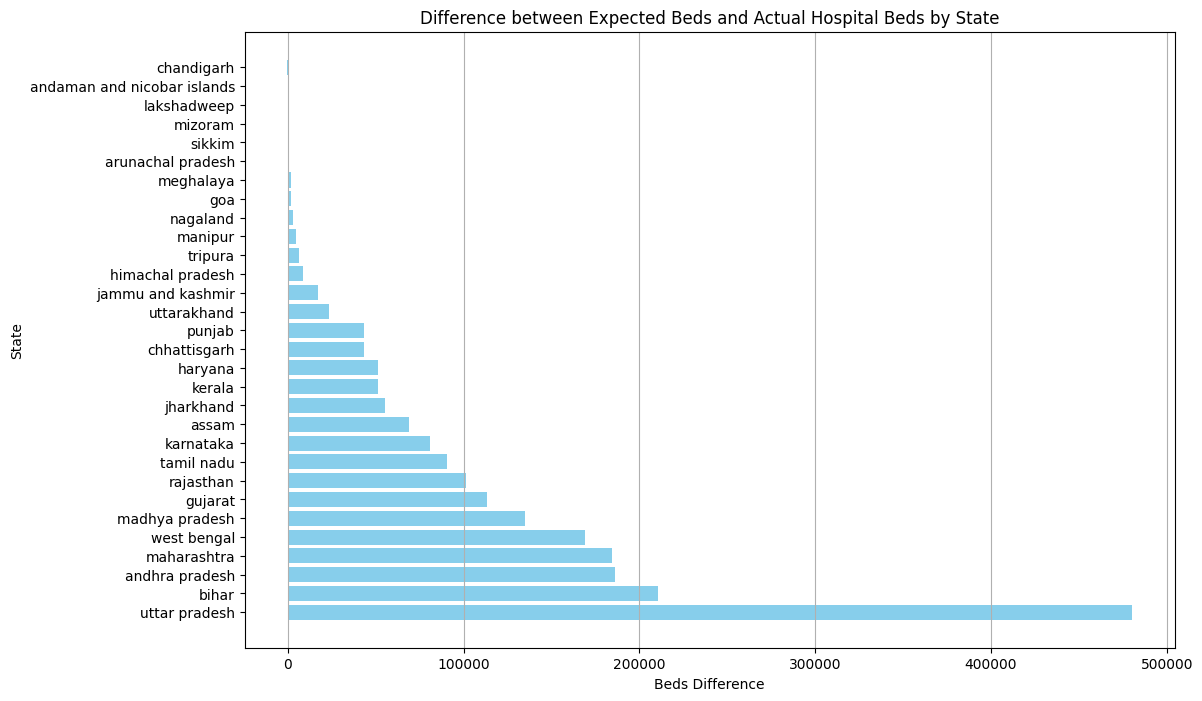

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load population data
total_state_population_data = pd.read_csv("/content/state_population.csv")

# Load healthcare
healthcare_data = pd.read_csv("/content/all_hospitals.csv")

# Convert the case of 'State name' and 'State/UT' columns to lowercase
total_state_population_data['State name'] = total_state_population_data['State name'].str.lower()
healthcare_data['State/UT'] = healthcare_data['State/UT'].str.lower()

# Merge both datasets on lowercase 'State/UT' column
merged_data = pd.merge(total_state_population_data, healthcare_data, left_on='State name', right_on='State/UT')

# Convert 'Hospital Beds' column to numeric
merged_data['Hospital Beds'] = pd.to_numeric(merged_data['Hospital Beds'], errors='coerce')

# Calculate expected beds
merged_data['expected_beds'] = (merged_data['Total Population'] / 1000) * 3

# Calculate the difference
merged_data['beds_difference'] = merged_data['expected_beds'] - merged_data['Hospital Beds']

# Sort the data by beds_difference for better visualization
merged_data_sorted = merged_data.sort_values(by='beds_difference', ascending=False)

print(merged_data[['State name', 'expected_beds', 'Hospital Beds', 'beds_difference']])


# Plotting
plt.figure(figsize=(12, 8))
plt.barh(merged_data_sorted['State name'], merged_data_sorted['beds_difference'], color='skyblue')
plt.xlabel('Beds Difference')
plt.ylabel('State')
plt.title('Difference between Expected Beds and Actual Hospital Beds by State')
plt.grid(axis='x')
plt.show()


**PROBLEM 17**

GUNJ CHARAN WAGHMARE - 22BTRCL058

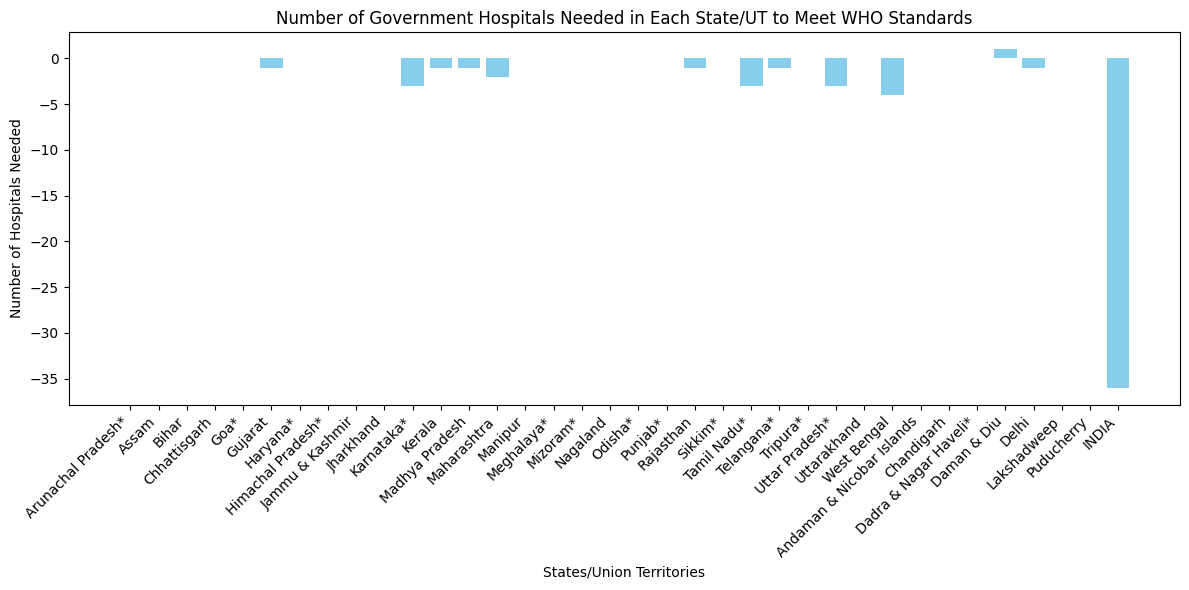

In [1]:
#Problem statement 17
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
hospital_data = pd.read_csv("/content/government_hospitals.csv")

# Calculate the average number of beds in a government hospital
avg_beds_per_hospital = (hospital_data['Rural_Government_Beds'].mean() + hospital_data['Urban_Government_Beds'].mean()) / 2

# WHO standards for number of beds
who_standards = 10000  # Assuming WHO standard for demonstration

# Calculate the gap in number of beds to reach WHO standards for each state/UT
hospital_data['Beds Gap'] = who_standards - (hospital_data['Rural_Government_Beds'] + hospital_data['Urban_Government_Beds'])

# Calculate the number of hospitals needed in each state/UT
hospital_data['Hospitals Needed'] = hospital_data['Beds Gap'] / avg_beds_per_hospital
hospital_data['Hospitals Needed'] = hospital_data['Hospitals Needed'].apply(lambda x: round(x))

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(hospital_data['State/UT'], hospital_data['Hospitals Needed'], color='skyblue')
plt.xlabel('States/Union Territories')
plt.ylabel('Number of Hospitals Needed')
plt.title('Number of Government Hospitals Needed in Each State/UT to Meet WHO Standards')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**PROBLEM 18**

VISHNU ROOPESH - 22BTRCL169

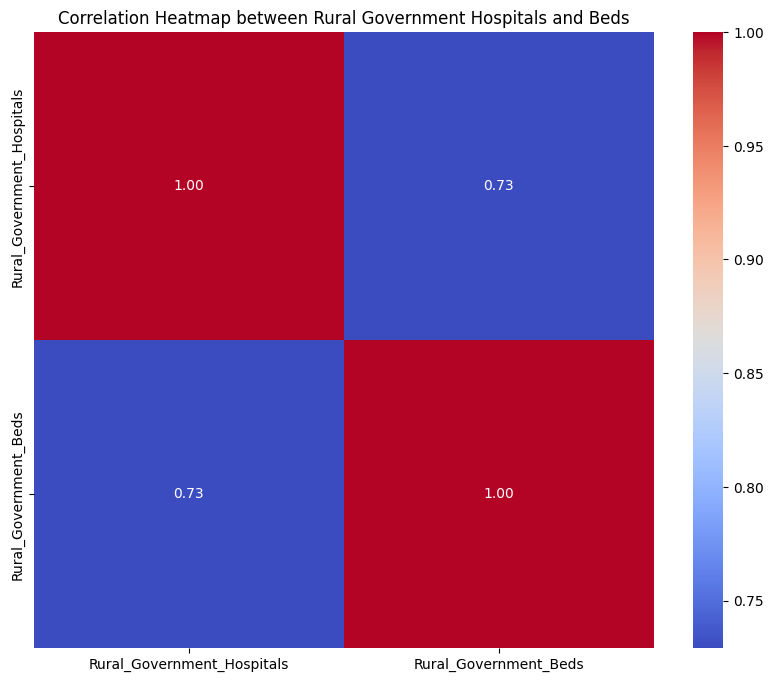

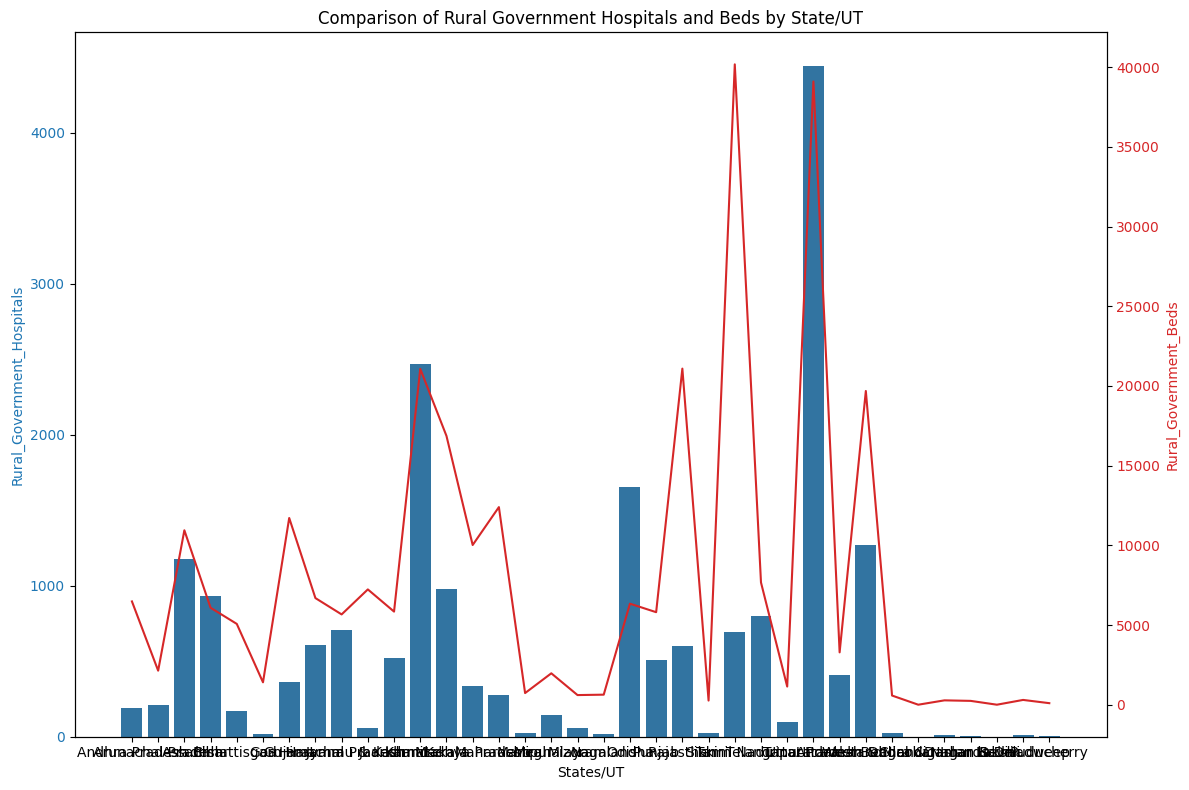

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
import pandas as pd

data = {
    "State/UT": ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
                 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
                 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
                 'West Bengal', 'Andaman & Nicobar Islands', 'Chandigarh', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Lakshadweep', 'Puducherry'],

    "Rural_Government_Hospitals": [193, 208, 1176, 930, 169, 17, 364, 609, 705, 56, 519, 2471, 981, 334, 273, 23, 143,
                                   56, 21, 1655, 510, 602, 24, 692, 802, 99, 4442, 410, 1272, 27, 0, 10, 5, 0, 9, 3],
    "Rural_Government_Beds": [6480, 2136, 10944, 6083, 5070, 1405, 11715, 6690, 5665, 7234, 5842, 21072, 16865, 10020,
                              12398, 730, 1970, 604, 630, 6339, 5805, 21088, 260, 40179, 7668, 1140, 39104, 3284, 19684, 575, 0, 273, 240, 0, 300, 96]
}

df = pd.DataFrame(data)

# Drop the 'State/UT' column before computing correlations
correlation_df = df.drop('State/UT', axis=1)

# Heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Rural Government Hospitals and Beds')
plt.show()

# Multi-axis plot to visualize both Rural_Government_Hospitals and Rural_Government_Beds
fig, ax1 = plt.subplots(figsize=(12, 8))

color = 'tab:blue'
ax1.set_xlabel('States/UT')
ax1.set_ylabel('Rural_Government_Hospitals', color=color)
sns.barplot(x='State/UT', y='Rural_Government_Hospitals', data=df, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Rural_Government_Beds', color=color)
sns.lineplot(x='State/UT', y='Rural_Government_Beds', data=df, sort=False, ax=ax2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Comparison of Rural Government Hospitals and Beds by State/UT')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
